# 03 - Exploratory Data Analysis: ICU (Intensive Care Unit)

## Objective
Analyze Intensive Care Unit (ICU) admissions, patient characteristics, vital signs monitoring, and outcomes for critically ill patients.

## Dataset
- **Source:** MIMIC-IV Clinical Database Demo v2.2
- **Tables:** 
  - `icustays.csv` - ICU admissions and stays
  - `chartevents.csv` - Vital signs and clinical measurements
  - `d_items.csv` - Dictionary of measured items
  - `patients.csv`, `admissions.csv`, `diagnoses_icd.csv` - For context

---

## 1. Setup & Imports

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully")

Libraries imported successfully


## 2. Load Data

In [2]:
# Define data paths
DATA_PATH_HOSP = '../../../../mimic-iv-demo/mimic-iv-clinical-database-demo-2.2/hosp/'
DATA_PATH_ICU = '../../../../mimic-iv-demo/mimic-iv-clinical-database-demo-2.2/icu/'

# Load ICU data
icustays = pd.read_csv(DATA_PATH_ICU + 'icustays.csv')
print(f"ICU stays data loaded: {icustays.shape[0]} rows, {icustays.shape[1]} columns")

# Load chart events (vital signs)
chartevents = pd.read_csv(DATA_PATH_ICU + 'chartevents.csv')
print(f"Chart events data loaded: {chartevents.shape[0]} rows, {chartevents.shape[1]} columns")

# Load items dictionary
d_items = pd.read_csv(DATA_PATH_ICU + 'd_items.csv')
print(f"Items dictionary loaded: {d_items.shape[0]} rows, {d_items.shape[1]} columns")

# Load supporting tables
patients = pd.read_csv(DATA_PATH_HOSP + 'patients.csv')
admissions = pd.read_csv(DATA_PATH_HOSP + 'admissions.csv')
diagnoses = pd.read_csv(DATA_PATH_HOSP + 'diagnoses_icd.csv')
icd_dict = pd.read_csv(DATA_PATH_HOSP + 'd_icd_diagnoses.csv')

print(f"Patients data loaded: {patients.shape[0]} rows")
print(f"Admissions data loaded: {admissions.shape[0]} rows")
print(f"Diagnoses data loaded: {diagnoses.shape[0]} rows")

ICU stays data loaded: 140 rows, 8 columns
Chart events data loaded: 668862 rows, 11 columns
Items dictionary loaded: 4014 rows, 9 columns
Patients data loaded: 100 rows
Admissions data loaded: 275 rows
Diagnoses data loaded: 4506 rows


## 3. ICU Stays Exploration

### 3.1 First Look at ICU Stays

In [3]:
# Display first rows
print("First rows of ICU stays:")
icustays.head(10)

First rows of ICU stays:


,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los
0,10018328,23786647,31269608,Neuro Stepdown,Neuro Stepdown,2154-04-24 23:03:44,2154-05-02 15:55:21,7.702512
1,10020187,24104168,37509585,Neuro Surgical Intensive Care Unit (Neuro SICU),Neuro Stepdown,2169-01-15 04:56:00,2169-01-20 15:47:50,5.452662
2,10020187,26842957,32554129,Neuro Intermediate,Neuro Intermediate,2170-02-24 18:18:46,2170-02-25 15:15:26,0.872685
3,10012853,27882036,31338022,Trauma SICU (TSICU),Trauma SICU (TSICU),2176-11-26 02:34:49,2176-11-29 20:58:54,3.766725
4,10020740,25826145,32145159,Trauma SICU (TSICU),Trauma SICU (TSICU),2150-06-03 20:12:32,2150-06-04 21:05:58,1.037106
5,10039708,23819016,38559363,Trauma SICU (TSICU),Trauma SICU (TSICU),2140-06-18 01:41:00,2140-06-19 21:47:16,1.837685
6,10020306,23052851,38540883,Trauma SICU (TSICU),Trauma SICU (TSICU),2135-01-21 17:01:57,2135-01-24 21:47:45,3.198472
7,10019568,28710730,30876334,Trauma SICU (TSICU),Trauma SICU (TSICU),2120-01-30 22:51:00,2120-01-31 18:25:12,0.815417
8,10018081,28861356,38333427,Trauma SICU (TSICU),Trauma SICU (TSICU),2134-08-05 14:53:33,2134-08-07 17:32:43,2.110532
9,10018081,21027282,37293400,Trauma SICU (TSICU),Trauma SICU (TSICU),2133-12-18 17:10:00,2134-01-01 14:44:53,13.899225


In [4]:
# Data info
icustays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subject_id      140 non-null    int64  
 1   hadm_id         140 non-null    int64  
 2   stay_id         140 non-null    int64  
 3   first_careunit  140 non-null    object 
 4   last_careunit   140 non-null    object 
 5   intime          140 non-null    object 
 6   outtime         140 non-null    object 
 7   los             140 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 8.9+ KB


In [5]:
# Check for missing values
print("Missing values in ICU stays:")
missing_icu = icustays.isnull().sum()
missing_icu_pct = (missing_icu / len(icustays)) * 100
missing_icu_df = pd.DataFrame({
    'Missing Values': missing_icu,
    'Percentage': missing_icu_pct
})
print(missing_icu_df[missing_icu_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False))

Missing values in ICU stays:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


### 3.2 Basic ICU Statistics

In [6]:
# Basic statistics
print("ICU OVERVIEW:")
print(f"Total ICU stays: {len(icustays)}")
print(f"Unique patients in ICU: {icustays['subject_id'].nunique()}")
print(f"Unique hospital admissions with ICU: {icustays['hadm_id'].nunique()}")

# Multiple ICU stays per admission
icu_per_admission = icustays.groupby('hadm_id').size()
print(f"\nAdmissions with multiple ICU stays: {(icu_per_admission > 1).sum()}")
print(f"Max ICU stays for single admission: {icu_per_admission.max()}")

ICU OVERVIEW:
Total ICU stays: 140
Unique patients in ICU: 100
Unique hospital admissions with ICU: 128

Admissions with multiple ICU stays: 9
Max ICU stays for single admission: 4


### 3.3 Length of Stay in ICU

In [7]:
# Convert datetime columns
icustays['intime'] = pd.to_datetime(icustays['intime'])
icustays['outtime'] = pd.to_datetime(icustays['outtime'])

# Calculate ICU length of stay in days
icustays['icu_los_days'] = (icustays['outtime'] - icustays['intime']).dt.total_seconds() / (24 * 3600)

print("ICU Length of Stay Statistics:")
print(icustays['icu_los_days'].describe())

ICU Length of Stay Statistics:
count    140.000000
mean       3.679379
std        3.896354
min        0.023727
25%        1.170663
50%        2.155093
75%        4.907749
max       20.528681
Name: icu_los_days, dtype: float64


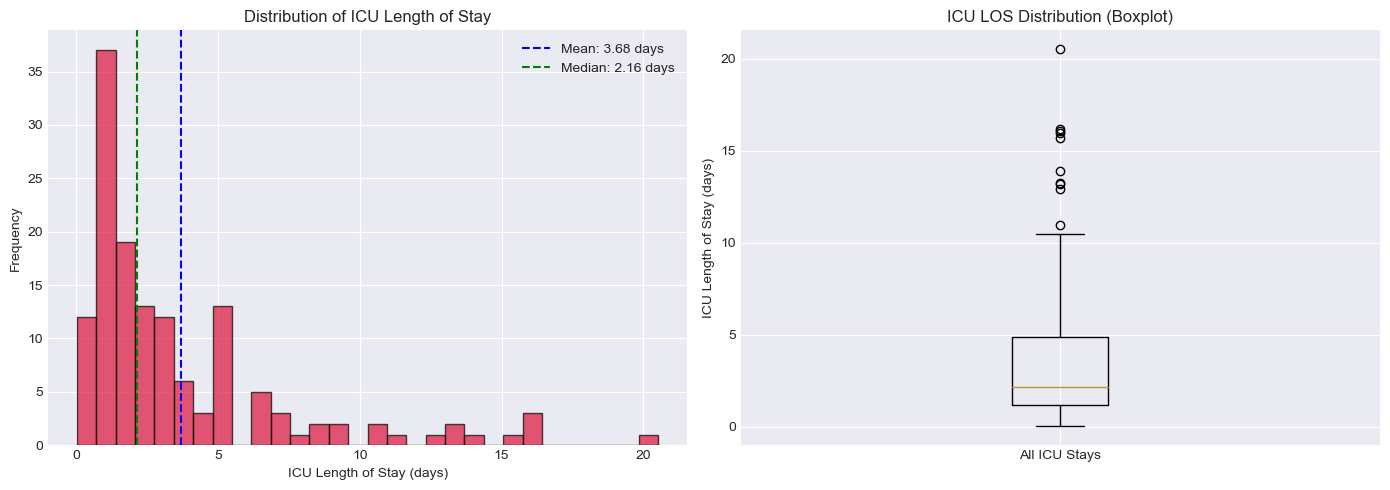


ICU Stay Categories:
  Short stay (≤ 1 day): 23 (16.4%)
  Medium stay (1-7 days): 97 (69.3%)
  Long stay (> 7 days): 20 (14.3%)


In [8]:
# Visualize ICU LOS distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(icustays['icu_los_days'], bins=30, edgecolor='black', alpha=0.7, color='crimson')
axes[0].set_xlabel('ICU Length of Stay (days)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of ICU Length of Stay')
axes[0].axvline(icustays['icu_los_days'].mean(), color='blue', linestyle='--', 
                label=f'Mean: {icustays["icu_los_days"].mean():.2f} days')
axes[0].axvline(icustays['icu_los_days'].median(), color='green', linestyle='--', 
                label=f'Median: {icustays["icu_los_days"].median():.2f} days')
axes[0].legend()

# Boxplot
axes[1].boxplot(icustays['icu_los_days'], vert=True)
axes[1].set_ylabel('ICU Length of Stay (days)')
axes[1].set_title('ICU LOS Distribution (Boxplot)')
axes[1].set_xticklabels(['All ICU Stays'])

plt.tight_layout()
plt.show()

# Categorize by stay length
short_stay = (icustays['icu_los_days'] <= 1).sum()
medium_stay = ((icustays['icu_los_days'] > 1) & (icustays['icu_los_days'] <= 7)).sum()
long_stay = (icustays['icu_los_days'] > 7).sum()

print(f"\nICU Stay Categories:")
print(f"  Short stay (≤ 1 day): {short_stay} ({short_stay/len(icustays)*100:.1f}%)")
print(f"  Medium stay (1-7 days): {medium_stay} ({medium_stay/len(icustays)*100:.1f}%)")
print(f"  Long stay (> 7 days): {long_stay} ({long_stay/len(icustays)*100:.1f}%)")

## 4. ICU Patient Demographics

### 4.1 Merge ICU with Patient Data

In [9]:
# Prepare admissions data
admissions['admittime'] = pd.to_datetime(admissions['admittime'])
admissions['dischtime'] = pd.to_datetime(admissions['dischtime'])
admissions['hospital_los_days'] = (admissions['dischtime'] - admissions['admittime']).dt.total_seconds() / (24 * 3600)

# Merge ICU stays with patient and admission data
icu_complete = icustays.merge(
    patients[['subject_id', 'gender', 'anchor_age', 'dod']], 
    on='subject_id', 
    how='left'
).merge(
    admissions[['hadm_id', 'admission_type', 'admission_location', 'discharge_location', 
                'insurance', 'hospital_expire_flag', 'hospital_los_days']], 
    on='hadm_id', 
    how='left'
)

print(f"Complete ICU dataset created: {icu_complete.shape[0]} rows, {icu_complete.shape[1]} columns")
icu_complete.head()

Complete ICU dataset created: 140 rows, 18 columns


,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,icu_los_days,gender,anchor_age,dod,admission_type,admission_location,discharge_location,insurance,hospital_expire_flag,hospital_los_days
0,10018328,23786647,31269608,Neuro Stepdown,Neuro Stepdown,2154-04-24 23:03:44,2154-05-02 15:55:21,7.702512,7.702512,F,83,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,0,9.447917
1,10020187,24104168,37509585,Neuro Surgical Intensive Care Unit (Neuro SICU),Neuro Stepdown,2169-01-15 04:56:00,2169-01-20 15:47:50,5.452662,5.452662,F,63,NaN,OBSERVATION ADMIT,EMERGENCY ROOM,HOME HEALTH CARE,Other,0,9.552778
2,10020187,26842957,32554129,Neuro Intermediate,Neuro Intermediate,2170-02-24 18:18:46,2170-02-25 15:15:26,0.872685,0.872685,F,63,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME,Other,0,1.625000
3,10012853,27882036,31338022,Trauma SICU (TSICU),Trauma SICU (TSICU),2176-11-26 02:34:49,2176-11-29 20:58:54,3.766725,3.766725,F,91,NaN,EW EMER.,EMERGENCY ROOM,SKILLED NURSING FACILITY,Medicare,0,7.747222
4,10020740,25826145,32145159,Trauma SICU (TSICU),Trauma SICU (TSICU),2150-06-03 20:12:32,2150-06-04 21:05:58,1.037106,1.037106,M,56,NaN,EW EMER.,PACU,SKILLED NURSING FACILITY,Other,0,3.786806


### 4.2 Age and Gender Distribution in ICU

Gender Distribution in ICU:
M    77
F    63
Name: gender, dtype: int64

Percentage:
M    55.0
F    45.0
Name: gender, dtype: float64


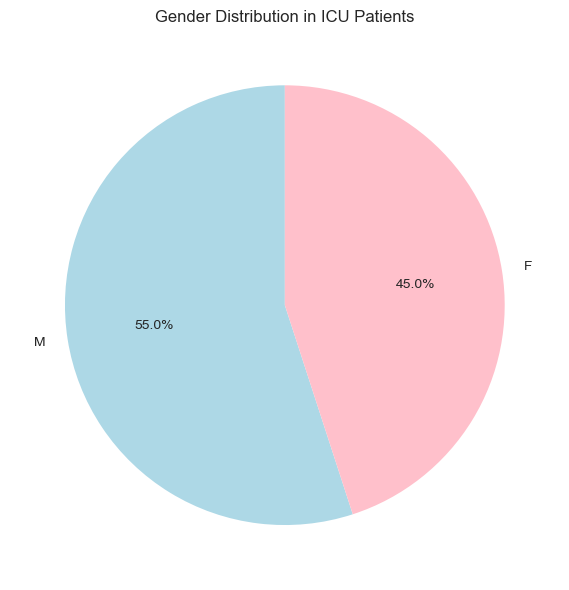

In [10]:
# Gender distribution in ICU
print("Gender Distribution in ICU:")
print(icu_complete['gender'].value_counts())
print(f"\nPercentage:")
print(icu_complete['gender'].value_counts(normalize=True) * 100)

# Visualize
fig, ax = plt.subplots(figsize=(8, 6))
icu_complete['gender'].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', 
                                             colors=['lightblue', 'pink'], startangle=90)
ax.set_title('Gender Distribution in ICU Patients')
ax.set_ylabel('')
plt.tight_layout()
plt.show()


Age Statistics for ICU Patients:
count    140.000000
mean      62.014286
std       15.424444
min       21.000000
25%       52.000000
50%       63.000000
75%       72.000000
max       91.000000
Name: anchor_age, dtype: float64


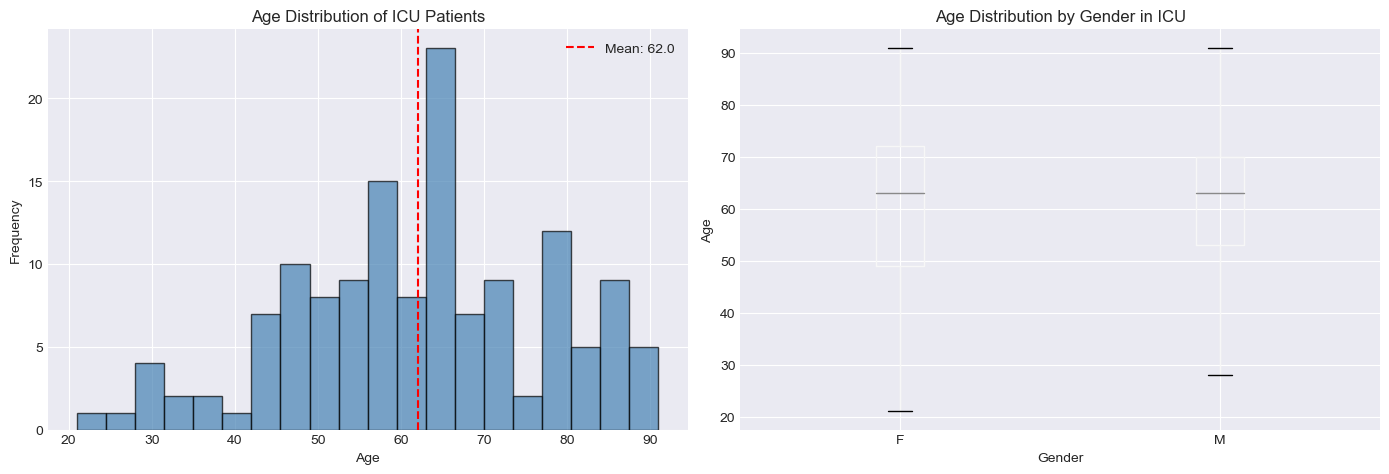

In [11]:
# Age distribution in ICU
print("\nAge Statistics for ICU Patients:")
print(icu_complete['anchor_age'].describe())

# Visualize age distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(icu_complete['anchor_age'], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Age Distribution of ICU Patients')
axes[0].axvline(icu_complete['anchor_age'].mean(), color='red', linestyle='--', 
                label=f'Mean: {icu_complete["anchor_age"].mean():.1f}')
axes[0].legend()

# Age by gender
icu_complete.boxplot(column='anchor_age', by='gender', ax=axes[1])
axes[1].set_title('Age Distribution by Gender in ICU')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Age')
plt.suptitle('')

plt.tight_layout()
plt.show()

### 4.3 ICU vs Non-ICU Comparison

In [12]:
# Identify which admissions had ICU stays
admissions['had_icu'] = admissions['hadm_id'].isin(icustays['hadm_id'])

# Merge with patients for comparison
admissions_with_patients = admissions.merge(
    patients[['subject_id', 'gender', 'anchor_age']], 
    on='subject_id', 
    how='left'
)

print("ICU Admission Statistics:")
print(f"Total admissions: {len(admissions)}")
print(f"Admissions with ICU stay: {admissions['had_icu'].sum()} ({admissions['had_icu'].sum()/len(admissions)*100:.1f}%)")
print(f"Admissions without ICU stay: {(~admissions['had_icu']).sum()} ({(~admissions['had_icu']).sum()/len(admissions)*100:.1f}%)")

ICU Admission Statistics:
Total admissions: 275
Admissions with ICU stay: 128 (46.5%)
Admissions without ICU stay: 147 (53.5%)



Age Comparison: ICU vs Non-ICU
         count       mean       std   min   25%   50%   75%   max
had_icu                                                          
False    147.0  60.462585  13.28315  21.0  53.0  60.0  66.0  91.0
True     128.0  61.710938  15.69149  21.0  52.0  63.0  72.0  91.0


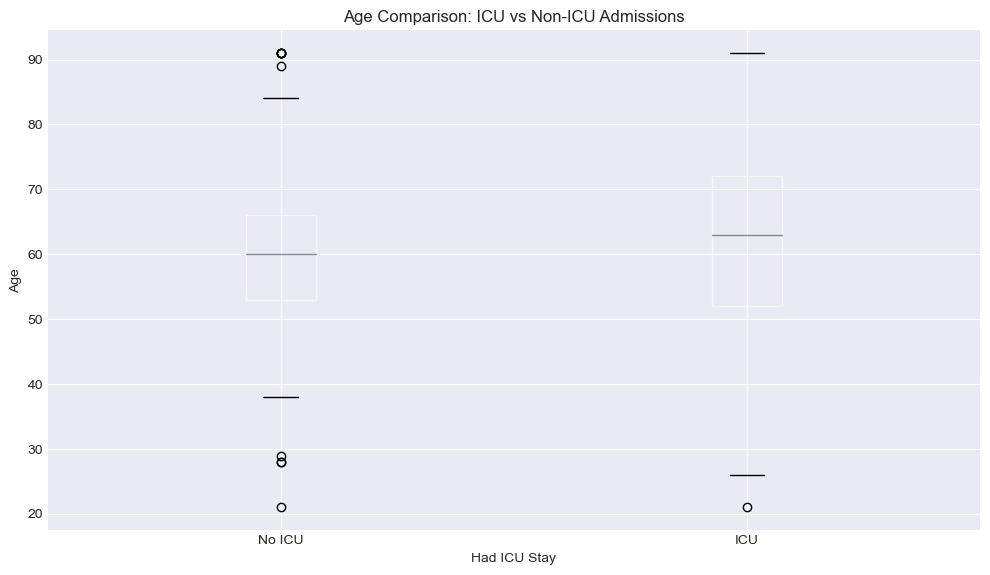

In [13]:
# Compare age between ICU and non-ICU patients
print("\nAge Comparison: ICU vs Non-ICU")
print(admissions_with_patients.groupby('had_icu')['anchor_age'].describe())

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
admissions_with_patients.boxplot(column='anchor_age', by='had_icu', ax=ax)
plt.suptitle('')
ax.set_title('Age Comparison: ICU vs Non-ICU Admissions')
ax.set_xlabel('Had ICU Stay')
ax.set_ylabel('Age')
ax.set_xticklabels(['No ICU', 'ICU'])
plt.tight_layout()
plt.show()


Hospital Length of Stay Comparison: ICU vs Non-ICU
         count      mean       std       min       25%       50%        75%  \
had_icu                                                                       
False    147.0  4.865585  5.359886  0.046528  1.346181  3.260417   6.038542   
True     128.0  9.183827  7.399814  0.756944  4.452083  6.923958  11.518056   

               max  
had_icu             
False    30.150694  
True     44.927778  


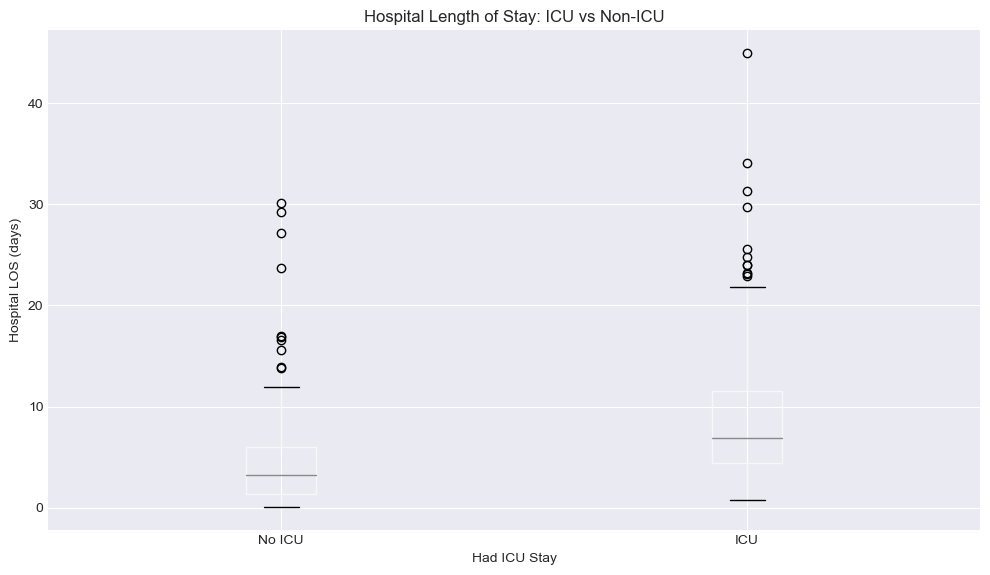

In [14]:
# Compare hospital LOS: ICU vs Non-ICU
print("\nHospital Length of Stay Comparison: ICU vs Non-ICU")
print(admissions_with_patients.groupby('had_icu')['hospital_los_days'].describe())

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
admissions_with_patients.boxplot(column='hospital_los_days', by='had_icu', ax=ax)
plt.suptitle('')
ax.set_title('Hospital Length of Stay: ICU vs Non-ICU')
ax.set_xlabel('Had ICU Stay')
ax.set_ylabel('Hospital LOS (days)')
ax.set_xticklabels(['No ICU', 'ICU'])
plt.tight_layout()
plt.show()

## 5. ICU Mortality Analysis

### 5.1 Overall ICU Mortality

In [15]:
# ICU mortality rate
icu_deaths = icu_complete['hospital_expire_flag'].sum()
icu_mortality_rate = (icu_deaths / len(icu_complete)) * 100

print("ICU MORTALITY ANALYSIS:")
print(f"Total ICU stays: {len(icu_complete)}")
print(f"Deaths during ICU admission: {icu_deaths}")
print(f"ICU mortality rate: {icu_mortality_rate:.2f}%")

# Compare with non-ICU mortality
non_icu_deaths = admissions_with_patients[~admissions_with_patients['had_icu']]['hospital_expire_flag'].sum()
non_icu_total = (~admissions_with_patients['had_icu']).sum()
non_icu_mortality_rate = (non_icu_deaths / non_icu_total) * 100

print(f"\nNon-ICU mortality rate: {non_icu_mortality_rate:.2f}%")
print(f"\nICU patients are {icu_mortality_rate/non_icu_mortality_rate:.1f}x more likely to die")

ICU MORTALITY ANALYSIS:
Total ICU stays: 140
Deaths during ICU admission: 20
ICU mortality rate: 14.29%

Non-ICU mortality rate: 0.00%

ICU patients are infx more likely to die


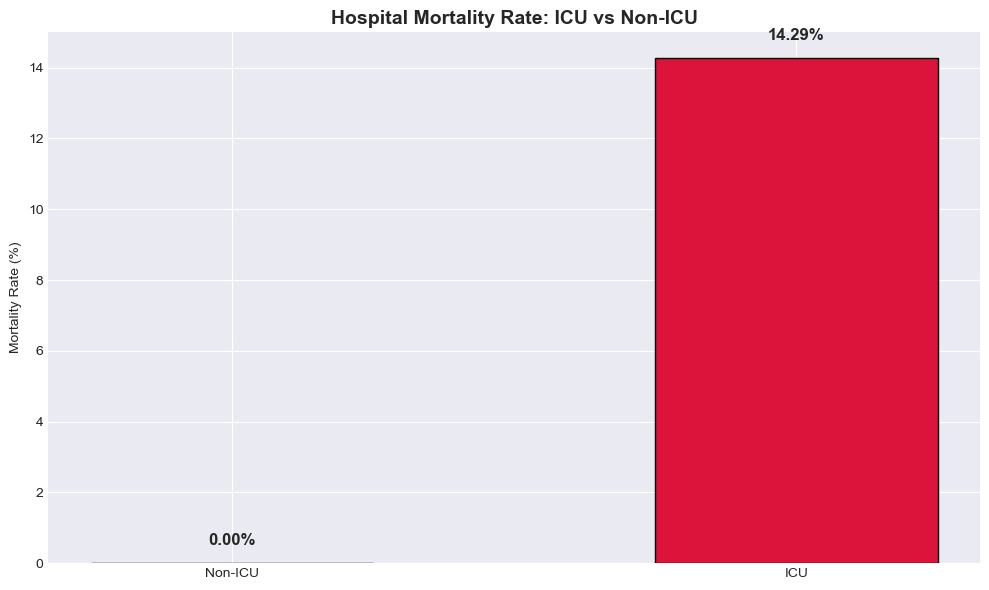

In [16]:
# Visualize mortality comparison
fig, ax = plt.subplots(figsize=(10, 6))

mortality_data = pd.DataFrame({
    'Group': ['Non-ICU', 'ICU'],
    'Mortality Rate (%)': [non_icu_mortality_rate, icu_mortality_rate]
})

ax.bar(mortality_data['Group'], mortality_data['Mortality Rate (%)'], 
       color=['lightgreen', 'crimson'], edgecolor='black', width=0.5)
ax.set_ylabel('Mortality Rate (%)')
ax.set_title('Hospital Mortality Rate: ICU vs Non-ICU', fontsize=14, fontweight='bold')

# Add value labels
for i, v in enumerate(mortality_data['Mortality Rate (%)']):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### 5.2 Mortality by ICU Length of Stay

ICU Length of Stay by Outcome:
                      count      mean       std       min       25%       50%  \
hospital_expire_flag                                                            
0                     120.0  3.304694  3.230205  0.155949  1.183857  2.049531   
1                      20.0  5.927487  6.285489  0.023727  0.826224  4.271302   

                            75%        max  
hospital_expire_flag                        
0                      4.453328  16.180787  
1                     10.436152  20.528681  


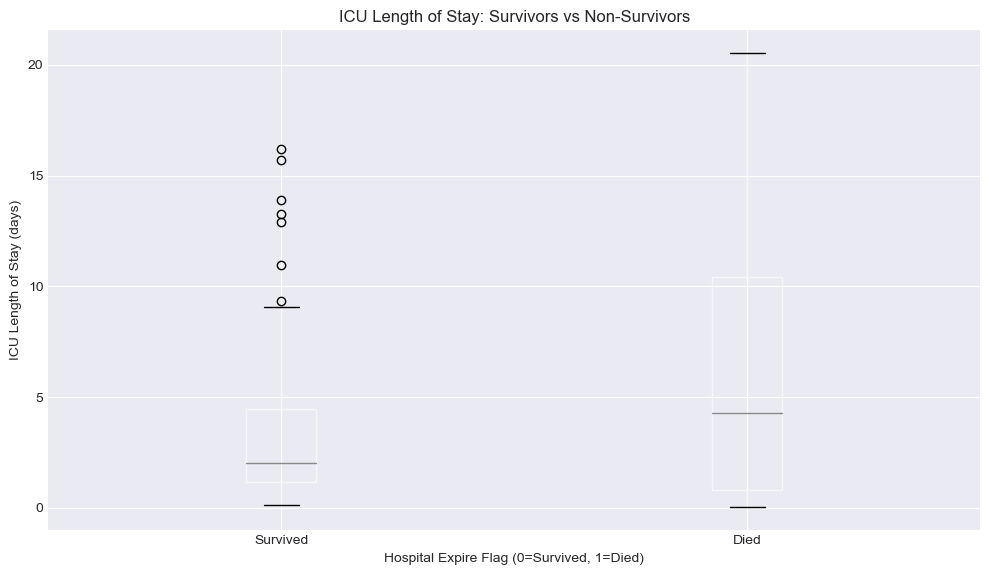

In [17]:
# Compare ICU LOS for survivors vs non-survivors
print("ICU Length of Stay by Outcome:")
print(icu_complete.groupby('hospital_expire_flag')['icu_los_days'].describe())

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
icu_complete.boxplot(column='icu_los_days', by='hospital_expire_flag', ax=ax)
plt.suptitle('')
ax.set_title('ICU Length of Stay: Survivors vs Non-Survivors')
ax.set_xlabel('Hospital Expire Flag (0=Survived, 1=Died)')
ax.set_ylabel('ICU Length of Stay (days)')
ax.set_xticklabels(['Survived', 'Died'])
plt.tight_layout()
plt.show()

### 5.3 Mortality by Age Group

posx and posy should be finite values
posx and posy should be finite values


ICU Mortality by Age Group:
           Deaths  Total  Mortality Rate
age_group                               
0-18            0      0             NaN
19-35           0      8        0.000000
36-50           0     22        0.000000
51-65           7     54       12.962963
66-80           8     37       21.621622
80+             5     19       26.315789


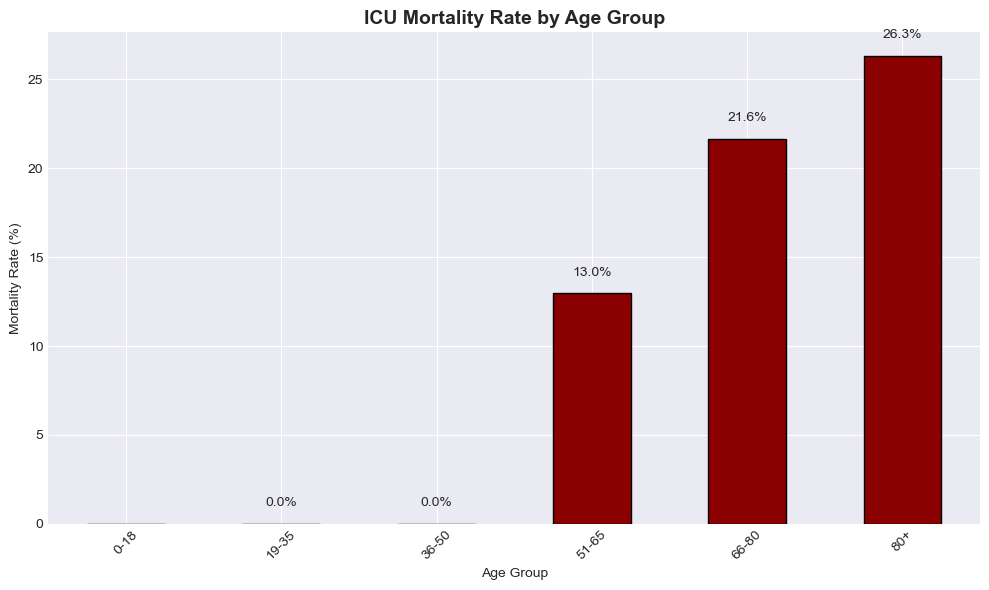

In [18]:
# Create age groups
icu_complete['age_group'] = pd.cut(icu_complete['anchor_age'], 
                                     bins=[0, 18, 35, 50, 65, 80, 100], 
                                     labels=['0-18', '19-35', '36-50', '51-65', '66-80', '80+'])

# Mortality by age group
mortality_by_age = icu_complete.groupby('age_group')['hospital_expire_flag'].agg(['sum', 'count', 'mean'])
mortality_by_age.columns = ['Deaths', 'Total', 'Mortality Rate']
mortality_by_age['Mortality Rate'] = mortality_by_age['Mortality Rate'] * 100

print("ICU Mortality by Age Group:")
print(mortality_by_age)

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
mortality_by_age['Mortality Rate'].plot(kind='bar', ax=ax, color='darkred', edgecolor='black')
ax.set_title('ICU Mortality Rate by Age Group', fontsize=14, fontweight='bold')
ax.set_xlabel('Age Group')
ax.set_ylabel('Mortality Rate (%)')
ax.tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(mortality_by_age['Mortality Rate']):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## 6. Vital Signs Analysis (Chart Events)

### 6.1 Explore Chart Events Data

In [19]:
# First look at chartevents
print("Chart Events Overview:")
print(f"Total measurements: {len(chartevents)}")
print(f"Unique ICU stays monitored: {chartevents['stay_id'].nunique()}")
print(f"Unique items measured: {chartevents['itemid'].nunique()}")

chartevents.head(10)

Chart Events Overview:
Total measurements: 668862
Unique ICU stays monitored: 140
Unique items measured: 1318


,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
0,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:45:00,225054,On,NaN,NaN,0.0
1,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:43:00,223769,100,100.0,%,0.0
2,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:47:00,223956,Atrial demand,NaN,NaN,0.0
3,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:47:00,224866,Yes,NaN,NaN,0.0
4,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:45:00,227341,No,0.0,NaN,0.0
5,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:47:00,224751,52,52.0,bpm,0.0
6,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:44:00,227969,"Quiet, calm space",NaN,NaN,0.0
7,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:46:00,223935,Doppler,NaN,NaN,0.0
8,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:48:00,223782,Intermittent,NaN,NaN,0.0
9,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:47:00,224773,Cool,NaN,NaN,0.0


In [20]:
# Merge with items dictionary to get readable names
chartevents_labeled = chartevents.merge(
    d_items[['itemid', 'label', 'category']], 
    on='itemid', 
    how='left'
)

print(f"Chart events with labels: {chartevents_labeled.shape[0]} rows")
chartevents_labeled.head(10)

Chart events with labels: 668862 rows


,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning,label,category
0,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:45:00,225054,On,NaN,NaN,0.0,Anti Embolic Device Status,Treatments
1,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:43:00,223769,100,100.0,%,0.0,O2 Saturation Pulseoxymetry Alarm - High,Alarms
2,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:47:00,223956,Atrial demand,NaN,NaN,0.0,Temporary Pacemaker Mode,Cardiovascular (Pacer Data)
3,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:47:00,224866,Yes,NaN,NaN,0.0,Temporary Atrial Capture,Cardiovascular (Pacer Data)
4,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:45:00,227341,No,0.0,NaN,0.0,History of falling (within 3 mnths),Restraint/Support Systems
5,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:47:00,224751,52,52.0,bpm,0.0,Temporary Pacemaker Rate,Cardiovascular (Pacer Data)
6,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:44:00,227969,"Quiet, calm space",NaN,NaN,0.0,Safety Measures,Restraint/Support Systems
7,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:46:00,223935,Doppler,NaN,NaN,0.0,PostTib. Pulses R,Cardiovascular (Pulses)
8,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:48:00,223782,Intermittent,NaN,NaN,0.0,Pain Type,Pain/Sedation
9,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:47:00,224773,Cool,NaN,NaN,0.0,LLE Temp,Cardiovascular


### 6.2 Most Common Vital Signs Measured

In [21]:
# Count measurements by item
item_counts = chartevents_labeled.groupby(['itemid', 'label']).size().reset_index(name='count')
item_counts = item_counts.sort_values('count', ascending=False)

print("Top 20 Most Measured Items:")
print(item_counts.head(20))

Top 20 Most Measured Items:
      itemid                                           label  count
917   227969                                 Safety Measures  19330
23    220210                                Respiratory Rate  13913
1     220045                                      Heart Rate  13913
30    220277                     O2 saturation pulseoxymetry  13540
4     220048                                    Heart Rhythm  12460
346   224650                                   Ectopy Type 1  11044
20    220180           Non Invasive Blood Pressure diastolic   8349
19    220179            Non Invasive Blood Pressure systolic   8347
21    220181                Non Invasive Blood Pressure mean   8342
912   227958                       Less Restrictive Measures   7675
7     220052                    Arterial Blood Pressure mean   5560
5     220050                Arterial Blood Pressure systolic   5525
6     220051               Arterial Blood Pressure diastolic   5524
1173  228928   Impai

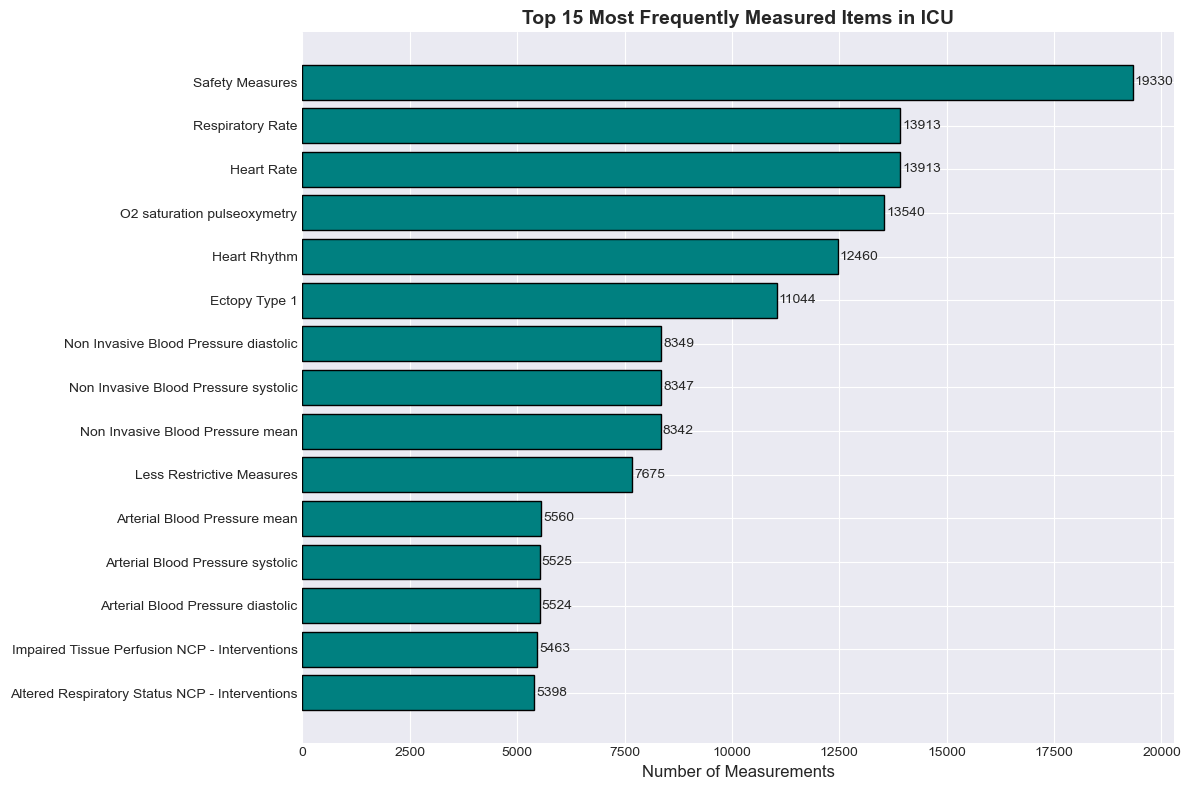

In [22]:
# Visualize top 15 measurements
fig, ax = plt.subplots(figsize=(12, 8))
top_15_items = item_counts.head(15)

ax.barh(range(len(top_15_items)), top_15_items['count'], color='teal', edgecolor='black')
ax.set_yticks(range(len(top_15_items)))
ax.set_yticklabels(top_15_items['label'])
ax.set_xlabel('Number of Measurements', fontsize=12)
ax.set_title('Top 15 Most Frequently Measured Items in ICU', fontsize=14, fontweight='bold')
ax.invert_yaxis()

# Add count labels
for i, v in enumerate(top_15_items['count']):
    ax.text(v + 50, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.show()

### 6.3 Vital Signs Value Analysis

In [23]:
# Focus on key vital signs (common ones with numeric values)
# Common vital signs: Heart Rate, Blood Pressure, Temperature, Respiratory Rate, SpO2

# Filter chartevents for vital signs with numeric values
vital_signs = chartevents_labeled[chartevents_labeled['valuenum'].notna()].copy()

print(f"Vital signs with numeric values: {len(vital_signs)}")
print(f"\nSample of vital signs:")
print(vital_signs[['label', 'valuenum']].head(20))

Vital signs with numeric values: 257474

Sample of vital signs:
                                       label  valuenum
1   O2 Saturation Pulseoxymetry Alarm - High     100.0
4        History of falling (within 3 mnths)       0.0
5                   Temporary Pacemaker Rate      52.0
11                    Heart Rate Alarm - Low      55.0
12      Central Venous Pressure  Alarm - Low       0.0
15        Temporary Atrial Sens Threshold mV       0.8
18     Pulmonary Artery Pressure Alarm - Low       0.0
20       Pulmonary Artery Pressure diastolic      12.0
21                         Resp Alarm - High      35.0
23                       Secondary diagnosis      15.0
25      Central Venous Pressure Alarm - High      20.0
29    Temporary Venticular Stim Threshold mA       5.0
36                   Heart rate Alarm - High     120.0
37                          Respiratory Rate      19.0
38                         Gait/Transferring       0.0
39    Pulmonary Artery Pressure Alarm - High      30.0
4

In [24]:
# Analyze top vital signs by frequency
top_vitals = vital_signs['label'].value_counts().head(10).index.tolist()

print(f"Top 10 vital signs to analyze:")
for i, vital in enumerate(top_vitals, 1):
    count = (vital_signs['label'] == vital).sum()
    print(f"{i}. {vital}: {count} measurements")

Top 10 vital signs to analyze:
1. Heart Rate: 13913 measurements
2. Respiratory Rate: 13913 measurements
3. O2 saturation pulseoxymetry: 13540 measurements
4. Non Invasive Blood Pressure diastolic: 8349 measurements
5. Non Invasive Blood Pressure systolic: 8347 measurements
6. Non Invasive Blood Pressure mean: 8342 measurements
7. Arterial Blood Pressure mean: 5560 measurements
8. Arterial Blood Pressure systolic: 5525 measurements
9. Arterial Blood Pressure diastolic: 5524 measurements
10. Temperature Fahrenheit: 3379 measurements


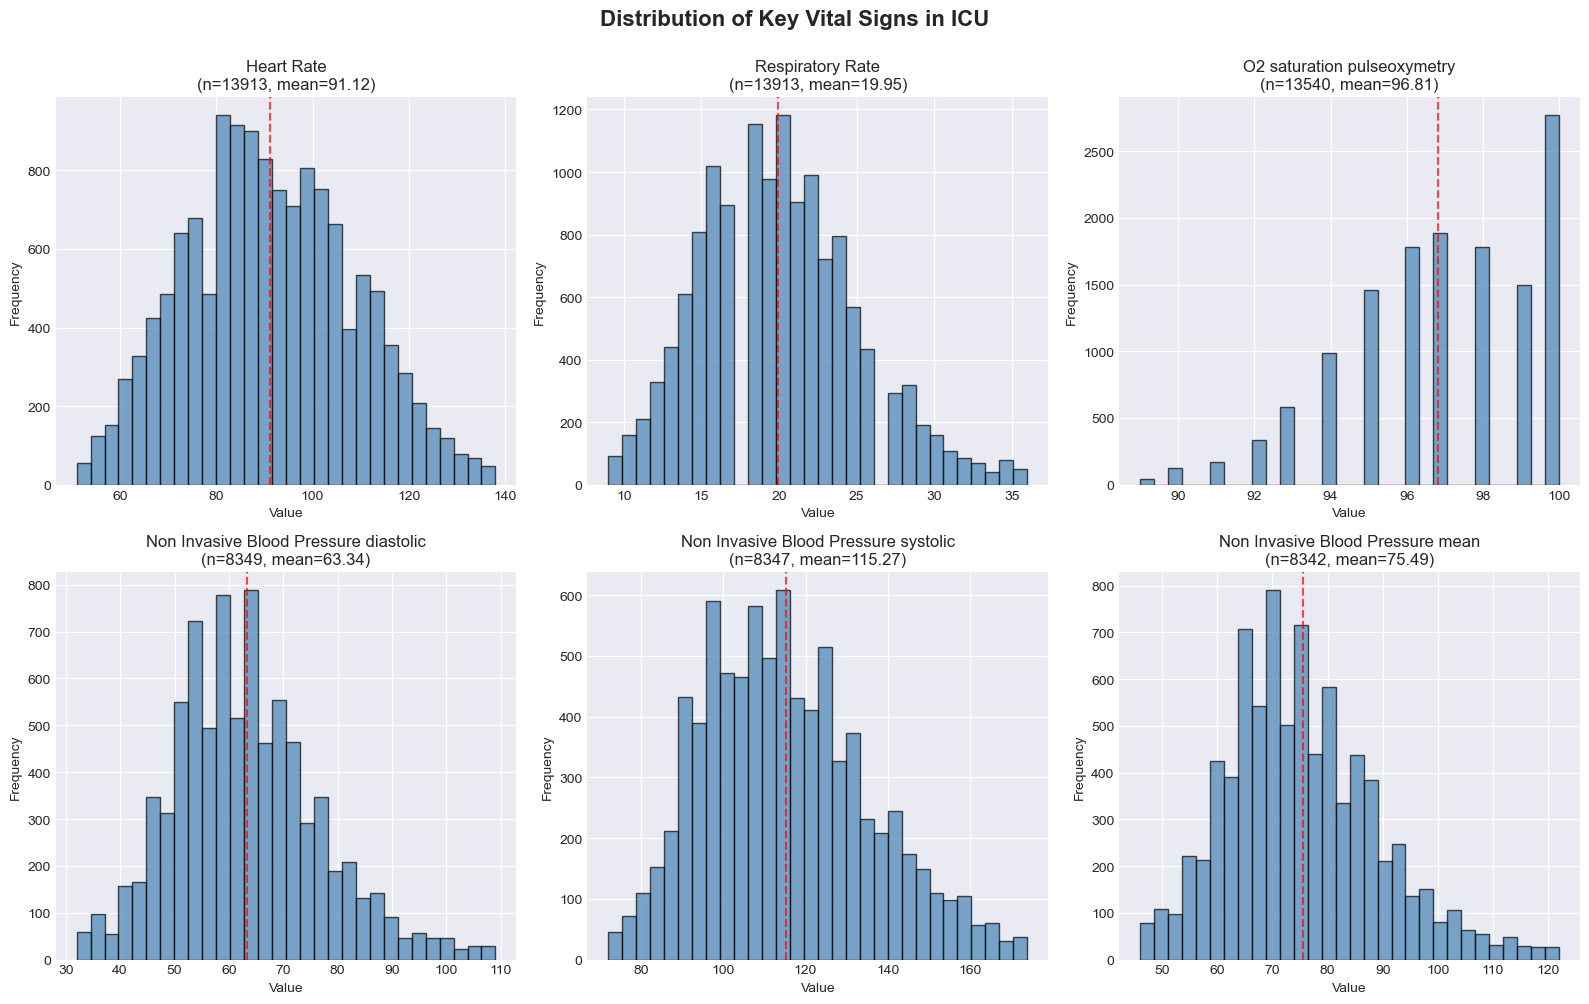

In [25]:
# Analyze distribution of top 6 vital signs
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, vital in enumerate(top_vitals[:6]):
    data = vital_signs[vital_signs['label'] == vital]['valuenum']
    
    # Remove extreme outliers for better visualization (keep values within 1st-99th percentile)
    q1, q99 = data.quantile([0.01, 0.99])
    data_filtered = data[(data >= q1) & (data <= q99)]
    
    axes[i].hist(data_filtered, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{vital}\n(n={len(data)}, mean={data.mean():.2f})')
    axes[i].axvline(data.mean(), color='red', linestyle='--', alpha=0.7)

plt.suptitle('Distribution of Key Vital Signs in ICU', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 7. Diagnoses in ICU Patients

### 7.1 Most Common Diagnoses in ICU Patients

In [26]:
# Get admissions that had ICU stays
icu_admissions = icustays['hadm_id'].unique()

# Filter diagnoses for ICU admissions
icu_diagnoses = diagnoses[diagnoses['hadm_id'].isin(icu_admissions)].copy()

# Merge with ICD dictionary
icu_diagnoses = icu_diagnoses.merge(
    icd_dict[['icd_code', 'icd_version', 'long_title']], 
    on=['icd_code', 'icd_version'], 
    how='left'
)

print(f"Total diagnoses for ICU admissions: {len(icu_diagnoses)}")
print(f"Unique diagnoses in ICU patients: {icu_diagnoses['icd_code'].nunique()}")

Total diagnoses for ICU admissions: 2329
Unique diagnoses in ICU patients: 1046


In [27]:
# Top diagnoses in ICU patients
icu_diagnosis_counts = icu_diagnoses.groupby(['icd_code', 'long_title']).size().reset_index(name='count')
icu_diagnosis_counts = icu_diagnosis_counts.sort_values('count', ascending=False)

print("Top 15 Diagnoses in ICU Patients:")
print(icu_diagnosis_counts.head(15))

Top 15 Diagnoses in ICU Patients:
     icd_code  \
151      4019   
62       2724   
518      E785   
161     41401   
786      N179   
1023   Z87891   
177     42731   
494      E039   
616       I10   
700      J449   
477       D62   
50      25000   
235     51881   
915     V1582   
115       311   

                                                                                               long_title  \
151                                                                    Unspecified essential hypertension   
62                                                                   Other and unspecified hyperlipidemia   
518                                                                           Hyperlipidemia, unspecified   
161                                                    Coronary atherosclerosis of native coronary artery   
786                                                                     Acute kidney failure, unspecified   
1023                                   

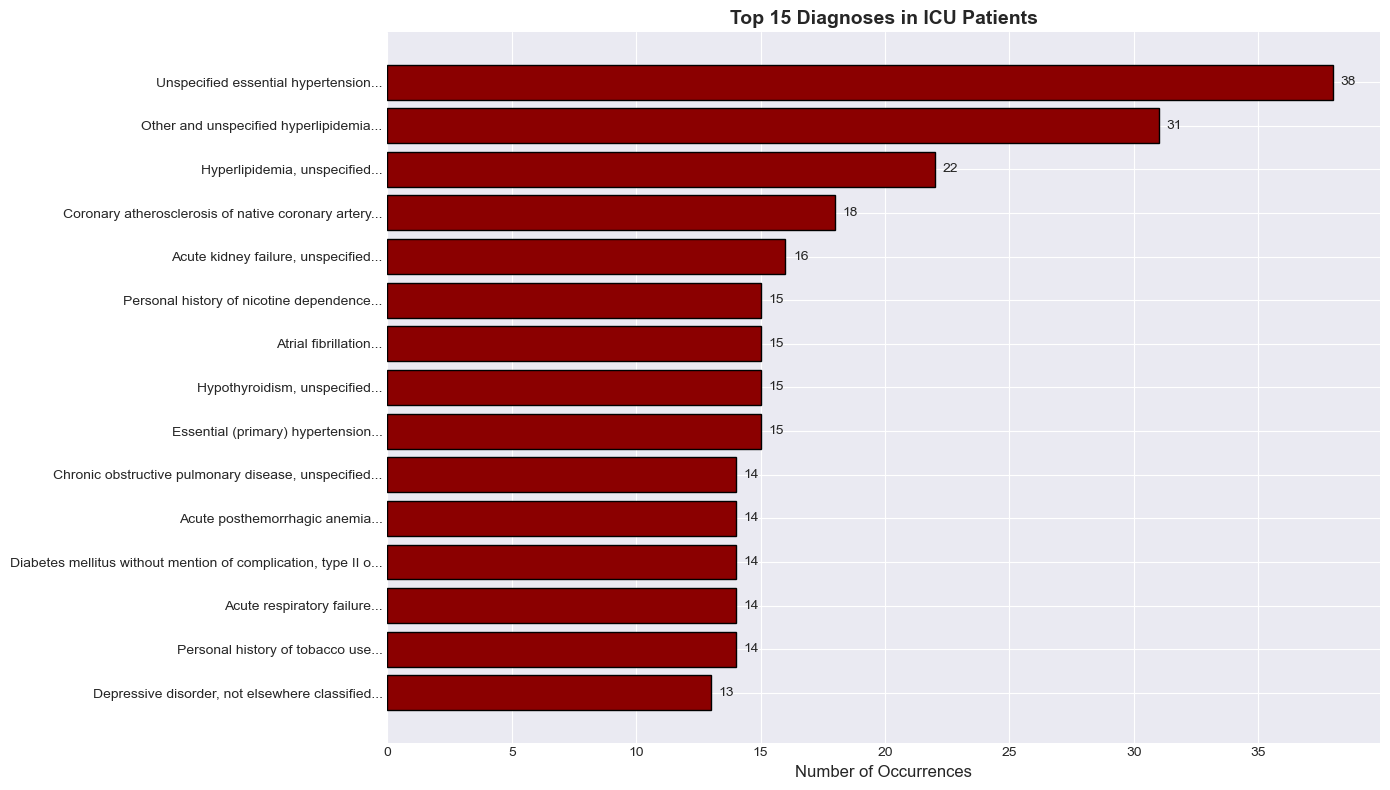

In [28]:
# Visualize top ICU diagnoses
fig, ax = plt.subplots(figsize=(14, 8))
top_15_icu_diag = icu_diagnosis_counts.head(15)

# Shorten titles
top_15_icu_diag['short_title'] = top_15_icu_diag['long_title'].str[:60] + '...'

ax.barh(range(len(top_15_icu_diag)), top_15_icu_diag['count'], color='darkred', edgecolor='black')
ax.set_yticks(range(len(top_15_icu_diag)))
ax.set_yticklabels(top_15_icu_diag['short_title'])
ax.set_xlabel('Number of Occurrences', fontsize=12)
ax.set_title('Top 15 Diagnoses in ICU Patients', fontsize=14, fontweight='bold')
ax.invert_yaxis()

# Add count labels
for i, v in enumerate(top_15_icu_diag['count']):
    ax.text(v + 0.3, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.show()

### 7.2 ICU Admission by Admission Type

Admission Type Distribution for ICU Patients:
EW EMER.                       67
URGENT                         31
OBSERVATION ADMIT              17
SURGICAL SAME DAY ADMISSION    15
DIRECT EMER.                    5
ELECTIVE                        5
Name: admission_type, dtype: int64


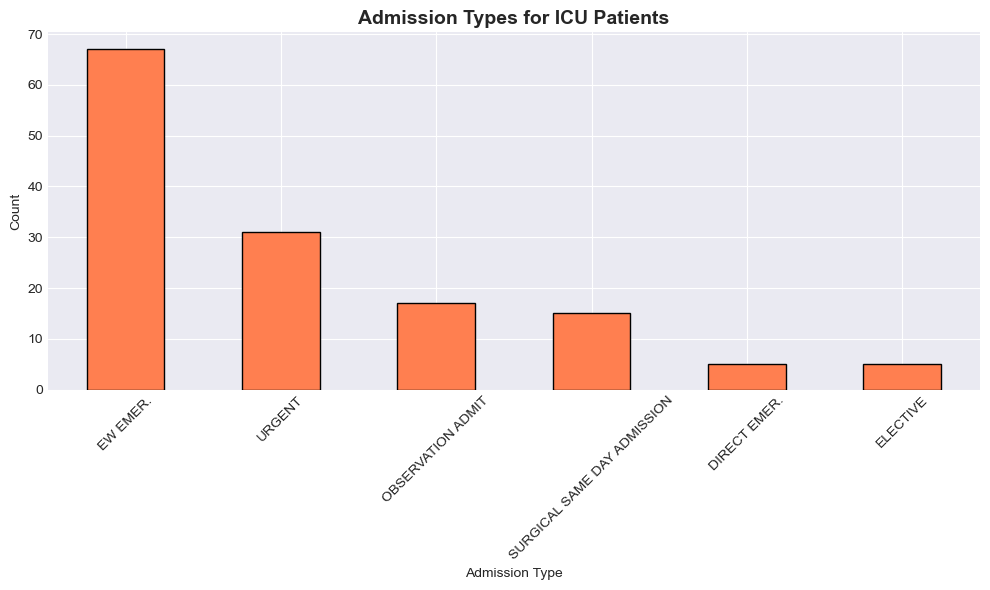

In [29]:
# Analyze admission types for ICU patients
print("Admission Type Distribution for ICU Patients:")
print(icu_complete['admission_type'].value_counts())

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
icu_complete['admission_type'].value_counts().plot(kind='bar', ax=ax, color='coral', edgecolor='black')
ax.set_title('Admission Types for ICU Patients', fontsize=14, fontweight='bold')
ax.set_xlabel('Admission Type')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## 8. Key Findings & Summary

In [ ]:
print("="*80)
print("KEY FINDINGS - ICU EXPLORATORY ANALYSIS")
print("="*80)

print("\nICU OVERVIEW:")
print(f"  Total ICU stays: {len(icustays)}")
print(f"  Unique patients in ICU: {icustays['subject_id'].nunique()}")
print(f"  % of admissions requiring ICU: {admissions['had_icu'].sum()/len(admissions)*100:.1f}%")

print("\nICU LENGTH OF STAY:")
print(f"  Average ICU stay: {icustays['icu_los_days'].mean():.2f} days")
print(f"  Median ICU stay: {icustays['icu_los_days'].median():.2f} days")
print(f"  Longest ICU stay: {icustays['icu_los_days'].max():.2f} days")

print("\nICU PATIENT DEMOGRAPHICS:")
print(f"  Average age: {icu_complete['anchor_age'].mean():.1f} years")
print(f"  Gender: {icu_complete['gender'].value_counts().to_dict()}")

print("\nMORTALITY ANALYSIS:")
print(f"  ICU mortality rate: {icu_mortality_rate:.2f}%")
print(f"  Non-ICU mortality rate: {non_icu_mortality_rate:.2f}%")
print(f"  ICU patients are {icu_mortality_rate/non_icu_mortality_rate:.1f}x more likely to die")

print("\nHOSPITAL STAY COMPARISON:")
avg_los_icu = admissions_with_patients[admissions_with_patients['had_icu']]['hospital_los_days'].mean()
avg_los_no_icu = admissions_with_patients[~admissions_with_patients['had_icu']]['hospital_los_days'].mean()
print(f"  Average hospital stay (with ICU): {avg_los_icu:.2f} days")
print(f"  Average hospital stay (without ICU): {avg_los_no_icu:.2f} days")

print("\nVITAL SIGNS MONITORING:")
print(f"  Total measurements recorded: {len(chartevents):,}")
print(f"  Unique items measured: {chartevents['itemid'].nunique()}")
print(f"  Most measured item: {item_counts.iloc[0]['label']} ({item_counts.iloc[0]['count']} times)")

print("\nTOP 3 DIAGNOSES IN ICU:")
for i, row in icu_diagnosis_counts.head(3).iterrows():
    print(f"  {row['long_title'][:70]}... ({row['count']} cases)")


KEY FINDINGS - ICU EXPLORATORY ANALYSIS

ICU OVERVIEW:
  Total ICU stays: 140
  Unique patients in ICU: 100
  % of admissions requiring ICU: 46.5%

ICU LENGTH OF STAY:
  Average ICU stay: 3.68 days
  Median ICU stay: 2.16 days
  Longest ICU stay: 20.53 days

ICU PATIENT DEMOGRAPHICS:
  Average age: 62.0 years
  Gender: {'M': 77, 'F': 63}

MORTALITY ANALYSIS:
  ICU mortality rate: 14.29%
  Non-ICU mortality rate: 0.00%
  ICU patients are infx more likely to die

HOSPITAL STAY COMPARISON:
  Average hospital stay (with ICU): 9.18 days
  Average hospital stay (without ICU): 4.87 days

VITAL SIGNS MONITORING:
  Total measurements recorded: 668,862
  Unique items measured: 1318
  Most measured item: Safety Measures (19330 times)

TOP 3 DIAGNOSES IN ICU:
  Unspecified essential hypertension... (38 cases)
  Other and unspecified hyperlipidemia... (31 cases)
  Hyperlipidemia, unspecified... (22 cases)

ICU analysis completed!
